# Project 1: Stories from the Atlas: Describing Data using Maps, Regressions, and Correlations

This notebook aims to showcase a Jupyter notebook-based implementation of Economics  1152's Project 1. The end product of the project is a 4-6 page narrative of the student's learnings from the Opportunity Atlas tool and dataset. With Jupyter notebooks, students can seamlessly integrate code with images and text, allowing them to explore the data, run regressions and complete their write-ups all within the same environment.

You can access The Opportunity Atlas using the following [link](https://www.opportunityatlas.org/). The original project specification, data and the course syllabus can be found [here](https://opportunityinsights.org/course/).

Note: While the project is intended to be completed in Stata or R, we are providing a Python-based implementation. Jupyter notebooks support R as well.

---

![title](fig1.png)

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

In [3]:
# Reading the dataset
atlas = pd.read_stata("atlas.dta")

# Taking a look at the first 5 rows of the dataset
atlas.head()

,tract,county,state,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,med_hhinc1990,popdensity2000,poor_share2010,poor_share2000,poor_share1990,share_black2010,share_hisp2010,share_asian2010,share_black2000,share_white2000,share_hisp2000,share_asian2000,gsmn_math_g3_2013,rent_twobed2015,singleparent_share2010,singleparent_share1990,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,nonwhite_share2010,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,kfr_natam_p25,kfr_natam_p75,kfr_natam_p100,kfr_asian_p25,kfr_asian_p75,kfr_asian_p100,kfr_black_p25,kfr_black_p75,kfr_black_p100,kfr_hisp_p25,kfr_hisp_p75,kfr_hisp_p100,kfr_pooled_p25,kfr_pooled_p75,kfr_pooled_p100,kfr_white_p25,kfr_white_p75,kfr_white_p100,count_pooled,count_white,count_black,count_asian,count_hisp,count_natam
0,20100,1.0,1.0,11101.0,Montgomery,68638.726562,26.171911,0.254428,0.156479,0.009950,66000.0,27375.0,195.723801,0.105030,0.126816,0.098872,0.119247,0.023013,0.004707,0.075482,0.896929,0.006247,0.003644,2.759864,NaN,0.113924,0.181185,0.250980,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,0.162657,504.751831,-0.006769,92.133049,NaN,NaN,NaN,NaN,NaN,NaN,26819.199219,45925.625000,84689.835938,NaN,NaN,NaN,27620.955078,51530.511719,78921.500000,30327.947266,50820.144531,75126.031250,519.0,457.0,42.0,3.0,4.0,6.0
1,20200,1.0,1.0,11101.0,Montgomery,57242.511719,24.806705,0.267194,0.146932,0.016337,41107.0,19000.0,566.381409,0.147590,0.227058,0.198339,0.564977,0.034562,0.002304,0.622093,0.354651,0.008457,0.003171,2.759864,907.0,0.488462,0.352459,0.392523,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,0.611060,1682.170532,-0.004253,971.317871,NaN,NaN,NaN,NaN,NaN,NaN,18138.107422,33841.527344,60512.210938,NaN,NaN,NaN,22303.058594,46649.738281,74225.367188,42188.812500,54239.121094,66645.695312,530.0,173.0,336.0,1.0,5.0,1.0
2,20300,1.0,1.0,11101.0,Montgomery,75647.726562,25.322525,0.164159,0.224413,0.027096,51250.0,29419.0,624.196838,0.080385,0.076640,0.113981,0.198043,0.025793,0.004744,0.149146,0.820006,0.016472,0.003893,2.759864,583.0,0.228070,0.125908,0.244856,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,0.247554,1633.413940,0.014218,340.920074,NaN,NaN,NaN,NaN,NaN,NaN,20514.958984,34133.125000,56515.757812,NaN,NaN,NaN,28215.480469,50753.542969,76055.359375,33670.453125,51579.382812,71990.968750,960.0,774.0,151.0,1.0,21.0,2.0
3,20400,1.0,1.0,11101.0,Montgomery,74852.054688,22.965347,0.252744,0.230469,0.015083,52704.0,37891.0,713.803955,0.063223,0.045485,0.067897,0.046740,0.019380,0.003648,0.025900,0.937884,0.022169,0.007288,2.759864,713.0,0.227533,0.126761,0.190722,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,0.081167,1780.032471,-0.019841,207.386368,NaN,NaN,NaN,NaN,NaN,NaN,12882.580078,40333.597656,105250.125000,26363.101562,67532.265625,NaN,33330.898438,52337.203125,72586.476562,34181.050781,52847.863281,74330.250000,1123.0,1033.0,40.0,6.0,37.0,0.0
4,20500,1.0,1.0,11101.0,Montgomery,96174.765625,26.222353,0.375063,0.321154,0.046488,52463.0,41516.0,529.930298,0.059569,0.036792,0.054734,0.139699,0.032974,0.026032,0.060099,0.897020,0.015728,0.010596,2.759864,923.0,0.259698,0.074364,0.168000,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,0.216236,2446.262207,0.018627,800.272644,NaN,NaN,NaN,NaN,NaN,NaN,26594.341797,42574.894531,72564.734375,17233.773438,44642.386719,93976.28125,34632.664062,57007.410156,81792.414062,39540.148438,58699.035156,80415.093750,1867.0,1626.0,137.0,13.0,39.0,8.0


In [4]:
# A quick look at the dataset's summary statistics
atlas.iloc[:, 5:].describe()

,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,med_hhinc1990,popdensity2000,poor_share2010,poor_share2000,poor_share1990,share_black2010,share_hisp2010,share_asian2010,share_black2000,share_white2000,share_hisp2000,share_asian2000,gsmn_math_g3_2013,rent_twobed2015,singleparent_share2010,singleparent_share1990,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,nonwhite_share2010,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,kfr_natam_p25,kfr_natam_p75,kfr_natam_p100,kfr_asian_p25,kfr_asian_p75,kfr_asian_p100,kfr_black_p25,kfr_black_p75,kfr_black_p100,kfr_hisp_p25,kfr_hisp_p75,kfr_hisp_p100,kfr_pooled_p25,kfr_pooled_p75,kfr_pooled_p100,kfr_white_p25,kfr_white_p75,kfr_white_p100,count_pooled,count_white,count_black,count_asian,count_hisp,count_natam
count,72302.000000,72313.000000,72993.000000,72343.000000,72279.000000,72763.000000,72313.000000,72469.000000,72933.000000,72315.000000,72323.000000,73111.000000,73111.000000,71945.000000,72368.000000,72368.000000,72368.000000,71050.000000,72090.000000,56607.000000,72564.000000,72196.000000,72285.000000,72939.000000,72344.000000,72547.000000,51635.000000,7.231100e+04,7.231100e+04,73111.000000,73194.000000,70664.000000,7.246300e+04,1733.000000,1728.000000,1594.000000,15434.000000,1.536000e+04,1.348000e+04,34086.000000,34049.000000,3.253600e+04,37611.000000,37579.000000,3.598700e+04,72011.000000,72012.000000,71968.000000,67978.000000,67968.000000,6.762700e+04,72451.000000,72451.000000,72451.000000,72451.000000,72451.000000,72451.000000
mean,80337.109375,26.954704,0.269401,0.237844,0.120907,58898.302434,32180.369039,1987.544067,0.150904,0.128387,0.132141,0.140898,0.160995,0.037696,0.131616,0.694370,0.118178,0.030612,3.187916,951.169096,0.332230,0.228800,0.293521,0.294998,0.594475,78.735001,0.042123,1.119958e+05,5.856561e+04,0.367269,5236.149414,0.015335,2.156935e+03,25475.554688,41832.242188,65393.386719,55014.621094,6.473021e+04,8.840310e+04,24855.986328,36212.863281,5.785375e+04,35566.445312,48260.269531,6.998277e+04,34443.398438,51500.578125,69698.953125,38443.328125,55148.011719,7.484015e+04,997.466136,607.611006,146.358698,33.403100,170.314350,9.345806
std,34410.160156,7.007171,0.182532,0.168641,0.137764,29641.956585,14319.904760,4544.378418,0.126946,0.109730,0.118104,0.222576,0.223197,0.076327,0.224890,0.295979,0.190217,0.066314,0.905744,393.524494,0.199712,0.154984,0.157742,0.155252,0.111975,7.739443,0.353301,2.515812e+05,1.553168e+05,0.306230,11712.526367,0.076178,1.876507e+04,10480.213867,21558.947266,67443.789062,20952.683594,2.822721e+04,8.488991e+04,8266.972656,13309.483398,4.963032e+04,10758.134766,15769.995117,5.560335e+04,8169.138672,9491.910156,18074.101562,8836.503906,10186.524414,2.430761e+04,503.401273,441.691473,282.491290,79.895551,328.842664,66.300670
min,7239.477051,2.500000,0.000000,0.000000,0.000000,3250.000000,4999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.706250,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.198844,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.606690,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57378.598633,22.042091,0.130949,0.110759,0.023031,38809.000000,22261.764875,97.797173,0.059105,0.050151,0.048797,0.013360,0.024428,0.003943,0.008978,0.533123,0.013245,0.003054,2.608067,682.000000,0.185094,0.124223,0.182534,0.184240,0.533117,74.300003,-0.137008,6.521500e+03,2.304000e+03,0.107778,319.438393,-0.018859,5.673720e+01,18300.923828,28163.683594,33656.641602,44180.634766,5.235515e+04,5.287754e+04,20531.751953,29024.921875,3.674166e+04,30070.766602,40260.330078,4.676888e+04,28973.000000,46162.286133,6

Using the Opportunity Atlas map, we can identify areas that are of interest to us. As an example, let's examine Downtown Berkeley's series of outcomes, as provided in the dataset. 

The website displays Tract codes in their entirety whereas the dataset segments them according to their state, county and tract FIPS codes. Downtown Berkeley's tract is "06001422900". The first two digits refer to the
state code, the next three digits refer to the county code, and the last 6 digits refer to the
tract code.

In [5]:
# Looking specifically at Downtown Berkeley
downtown_berkeley = atlas[(atlas["state"] == 6) & (atlas["county"] == 1) & (atlas["tract"] == 422900)]
downtown_berkeley

,tract,county,state,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,med_hhinc1990,popdensity2000,poor_share2010,poor_share2000,poor_share1990,share_black2010,share_hisp2010,share_asian2010,share_black2000,share_white2000,share_hisp2000,share_asian2000,gsmn_math_g3_2013,rent_twobed2015,singleparent_share2010,singleparent_share1990,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,nonwhite_share2010,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,kfr_natam_p25,kfr_natam_p75,kfr_natam_p100,kfr_asian_p25,kfr_asian_p75,kfr_asian_p100,kfr_black_p25,kfr_black_p75,kfr_black_p100,kfr_hisp_p25,kfr_hisp_p75,kfr_hisp_p100,kfr_pooled_p25,kfr_pooled_p75,kfr_pooled_p100,kfr_white_p25,kfr_white_p75,kfr_white_p100,count_pooled,count_white,count_black,count_asian,count_hisp,count_natam
3680,422900,1.0,6.0,37800.0,San Francisco,42193.550781,29.075464,0.664211,0.634448,0.383016,24056.0,15940.0,4438.842773,0.455815,0.422702,0.278385,0.101707,0.111854,0.317099,0.055877,0.445778,0.104305,0.313023,3.676772,NaN,0.0,0.671053,0.34,0.277276,0.566244,68.599998,0.624675,203612.0,126970.0,0.62869,20647.619141,-0.051841,31780.953125,NaN,NaN,NaN,46513.621094,87647.929688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37669.910156,76679.859375,145063.046875,NaN,NaN,NaN,86.0,19.0,1.0,37.0,20.0,0.0


### How does average upward mobility, pooling races and genders, for children with parents at the 25th percentile (````kfr_pooled_p25````) in your home Census tract compare to mean (population-weighted, using ```count_pooled```) upward mobility in your state and in the U.S. overall? Do kids where you grew up have better or worse chances of climbing the income ladder than the average child in America?

```kfr_pooled_p25``` is defined to be: Household income (\\$) at age 31-37 for children with parents at the 25th percentile of the national income distribution. This translates to \\$37,669.91 in Downtown Berkeley.

In [6]:
downtown_berkeley["kfr_pooled_p25"].iloc[0]

37669.91

In order to construct a population-weighted average of upward mobility at the 25th percentile, we need to drop NaN rows within ```kfr_pooled_p25``` and ```count_pooled```.

In [7]:
state_upward_mobility = atlas[atlas["state"] == 6].loc[:, ["kfr_pooled_p25", "count_pooled"]].dropna()
state_upward_mobility.head()

,kfr_pooled_p25,count_pooled
3546,37855.210938,317.0
3547,53785.621094,257.0
3548,33056.726562,652.0
3549,29311.062500,468.0
3550,26151.162109,539.0


From here, we can construct the weighted average of ```kfr_pooled_p25``` using ```count_pooled``` as weights.

In [8]:
np.average(state_upward_mobility["kfr_pooled_p25"], weights = state_upward_mobility["count_pooled"])

35765.82345503923

As compared to the whole state, children with parents at the 25th percentile of national incomes growing up in Downtown Berkeley earn nearly \\$2,000 more at ages 31-37 than the average child with parents at the same percentile in California. Let's compare this value with the national average.

In [9]:
national_upward_mobility = atlas.loc[:, ["kfr_pooled_p25", "count_pooled"]].dropna()
national_upward_mobility.head()

,kfr_pooled_p25,count_pooled
0,27620.955078,519.0
1,22303.058594,530.0
2,28215.480469,960.0
3,33330.898438,1123.0
4,34632.664062,1867.0


In [10]:
np.average(national_upward_mobility["kfr_pooled_p25"], weights = national_upward_mobility["count_pooled"])

34311.68270910974

As compared to the national average, children from Downtown Berkeley do even better, earning around $3,300 more at ages 31-37. This possibly points to better chances at climbing the income ladder relative to the state and even more so the national average. 

### What is the standard deviation of upward mobility (population-weighted) in your home county? Is it larger or smaller than the standard deviation across tracts in your state? Across tracts in the country? What do you learn from these comparisons?

In [11]:
county_upward_mobility = atlas[(atlas["state"] == 6) & (atlas["county"] == 1)].loc[:, ["kfr_pooled_p25", "count_pooled"]].dropna()
county_upward_mobility.head()

,kfr_pooled_p25,count_pooled
3546,37855.210938,317.0
3547,53785.621094,257.0
3548,33056.726562,652.0
3549,29311.062500,468.0
3550,26151.162109,539.0


In [12]:
# Standard Deviation of kfr_pooled_p25 for county 1 (San Francisco)
np.sqrt(np.cov(county_upward_mobility["kfr_pooled_p25"], aweights=county_upward_mobility["count_pooled"]))

8271.008001091912

In [13]:
# Standard Deviation of kfr_pooled_p25 for California
np.sqrt(np.cov(state_upward_mobility["kfr_pooled_p25"], aweights=state_upward_mobility["count_pooled"]))

6560.289640836094

In [14]:
# Standard Deviation of kfr_pooled_p25 for the whole country
np.sqrt(np.cov(national_upward_mobility["kfr_pooled_p25"], aweights=national_upward_mobility["count_pooled"]))

7899.599540977928

In San Francisco county, there is more spread in outcomes relative to California, but less so compared to the whole country. This perhaps hints at a larger degree of income inequality in San Francisco county, wherein the ladder one must climb to achieve economic mobility is longer than that present in California or the rest of the nation.

### Now let’s turn to downward mobility: repeat the previous two questions looking at children who start with parents at the 75th and 100th percentiles. How do the patterns differ?

In [15]:
berkeley_p75 = downtown_berkeley["kfr_pooled_p75"].iloc[0]
berkeley_p100 = downtown_berkeley["kfr_pooled_p100"].iloc[0]

In [16]:
state_p75 = atlas[atlas["state"] == 6].loc[:, ["kfr_pooled_p75", "count_pooled"]].dropna()
state_p100 = atlas[atlas["state"] == 6].loc[:, ["kfr_pooled_p100", "count_pooled"]].dropna()

In [17]:
national_p75 = atlas.loc[:, ["kfr_pooled_p75", "count_pooled"]].dropna()
national_p100 = atlas.loc[:, ["kfr_pooled_p100", "count_pooled"]].dropna()

In [18]:
state_p75_avg = np.average(state_p75["kfr_pooled_p75"], weights = state_p75["count_pooled"])
state_p100_avg = np.average(state_p100["kfr_pooled_p100"], weights = state_p100["count_pooled"])
national_p75_avg = np.average(national_p75["kfr_pooled_p75"], weights = national_p75["count_pooled"])
national_p100_avg = np.average(national_p100["kfr_pooled_p100"], weights = national_p100["count_pooled"])

In [19]:
downward_mobility = pd.DataFrame.from_dict({"75th percentile" : [berkeley_p75, state_p75_avg, national_p75_avg], 
"100th percentile" : [berkeley_p100, state_p100_avg, national_p100_avg]})
downward_mobility.rename(index = {0 : "Berkeley", 1 : "California", 2 : "National"}, inplace = True)
downward_mobility

,75th percentile,100th percentile
Berkeley,76679.859375,145063.046875
California,48995.071875,62346.794856
National,51284.027674,69218.145952


### Using a linear regression, estimate the relationship between outcomes of children at the 25th and 75th percentile for the Census tracts in your home county. Generate a scatter plot to visualize this regression. Do areas where children from low-income families do well generally have better outcomes for those from high-income families, too?

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [21]:
p25_p75 = atlas[(atlas["state"] == 6) & (atlas["county"] == 1)].loc[:, ["tract", "kfr_pooled_p25", "kfr_pooled_p75"]].dropna()
p25_p75.head()

,tract,kfr_pooled_p25,kfr_pooled_p75
3546,400100,37855.210938,52668.382812
3547,400200,53785.621094,56899.242188
3548,400300,33056.726562,54745.128906
3549,400400,29311.062500,47718.914062
3550,400500,26151.162109,41068.332031


In [22]:
X = sm.add_constant(p25_p75["kfr_pooled_p25"])
y = p25_p75["kfr_pooled_p75"]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         kfr_pooled_p75   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     514.6
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           5.52e-71
Time:                        00:55:20   Log-Likelihood:                -3593.0
No. Observations:                 356   AIC:                             7190.
Df Residuals:                     354   BIC:                             7198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.91e+04   1423.780     13.416      0.000    1.63e+04    2.19e+04
kfr_pooled_p25     0.8212      0.036     22.685      0.000       0.750       0.892
==============================================================================
Omnibus:                       32.434   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.614
Skew:                          -0.456   Prob(JB):                     3.81e-17
Kurtosis:                       5.065   Cond. No.                     1.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

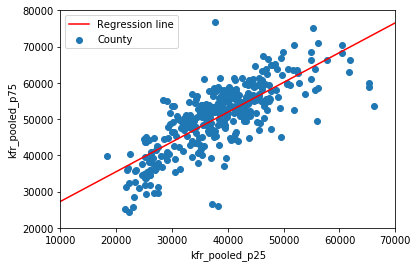

In [23]:
plt.scatter(x = p25_p75["kfr_pooled_p25"], y = p25_p75["kfr_pooled_p75"], label = "County")
plt.plot(np.arange(10000, 70001), np.arange(10000, 70001) * results.params[1] + results.params[0], "r-", label = "Regression line")
plt.xlabel("kfr_pooled_p25")
plt.ylabel("kfr_pooled_p75")
plt.xlim(10000, 70000)
plt.ylim(20000, 80000)
plt.legend();

We see a positive relationship between outcomes of children at the 25th percentile versus their counterparts at the 75th percentile. The coefficient on ```kfr_pooled_p25``` is 0.8212, indicating that, on average, children from low-income families end up earning about 80% of their high-income counterparts.  We can confirm this visually using the scatter plot as well. In tracts where low-income families do well, high-income families also do well.